# 설문조사 응답 분석
캐글 링크
- https://www.kaggle.com/kaggle/kaggle-survey-2017

__캐글러를 대상으로 한 설문조사__

- 설문기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171 개 국가 및 지역에서 16,716 명의 응답자
- 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
- 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정

__데이터 파일__

5 개의 데이터 파일을 제공

- schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
- multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
- conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)
- RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

## 1. 설문조사 응답 분석1 - 데이터 사이언스 어떤 사람들이 할까요?

In [1]:
# 노트북 안에 그래프 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings
# 노트북 warnings 무시 처리
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding='ISO=8859-1', low_memory=False)

# 16716명 응답, 선다형 객관식 지문 228개
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,Male,Japan,27.0,Employed full-time,NaN,NaN,No,Yes,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


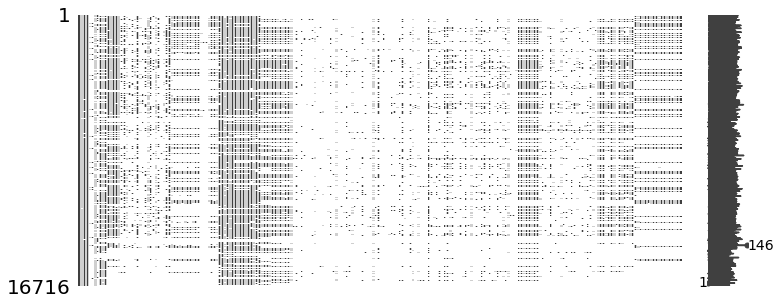

In [9]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터 컬럼이 많아 아래 그래프만으로 내용을 파악하기 어렵다
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

- 그림에서 흰 부분이 결측치를 의미한다.
- 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

### 설문통계

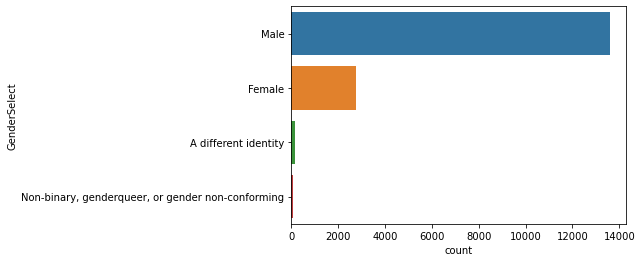

In [10]:
# 성별
sns.countplot(y='GenderSelect', data=mcq, order=mcq['GenderSelect'].value_counts().index)

응답 비율 : 여성 < 남성

In [11]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts())

con_df

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535
People 's Republic of China,471
Brazil,465
Germany,460
France,442
Canada,440


In [12]:
# country 컬럼을 인덱스로 지정
con_df['국가'] = con_df.index
con_df

,Country,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [13]:
# 컬럼의 순서대로 응답 수 , 국가로 컬럼명을 지정
con_df.columns = ['응답 수', '국가']
con_df

,응답 수,국가
United States,4197,United States
India,2704,India
Other,1023,Other
Russia,578,Russia
United Kingdom,535,United Kingdom
People 's Republic of China,471,People 's Republic of China
Brazil,465,Brazil
Germany,460,Germany
France,442,France
Canada,440,Canada


In [14]:
# index 컬럼 삭제하고 순위를 알기 위해 reset_index()를 한다.
# 전체 52개국 중 20위까지 표시. 우리나라는 18위
# axis = 0 : 행 기준
# axis = 1 : 열 기준
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


순위 구하기
- https://rfriend.tistory.com/461

접두어 추가
- https://www.it-swarm-ko.tech/ko/python/pandas%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EB%AC%B8%EC%9E%90%EC%97%B4-%EC%97%B4%EC%9D%98-%EA%B0%81-%EA%B0%92%EC%97%90-%EB%AC%B8%EC%9E%90%EC%97%B4-%EC%A0%91%EB%91%90%EC%82%AC-%EC%B6%94%EA%B0%80/1043222546/

데이터 프레임 컬럼 순서 변경
- https://hogni.tistory.com/51


데이터 프레임 인덱스 숨기기
- https://www.it-swarm-ko.tech/ko/python/pandas-%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%94%84%EB%A0%88%EC%9E%84-%EC%88%A8%EA%B8%B0%EA%B8%B0-%EC%9D%B8%EB%8D%B1%EC%8A%A4-%EA%B8%B0%EB%8A%A5/1043925857/

In [15]:
con_df_rank = con_df.copy()

In [16]:
con_df_rank['순위'] = con_df_rank['응답 수'].rank(method='max', ascending=False).astype(int)
con_df_rank['순위'] = con_df_rank['순위'].astype(str) + '등'
con_df_rank = con_df_rank[['순위','국가','응답 수']]
con_df_rank

,순위,국가,응답 수
0,1등,United States,4197
1,2등,India,2704
2,3등,Other,1023
3,4등,Russia,578
4,5등,United Kingdom,535
5,6등,People 's Republic of China,471
6,7등,Brazil,465
7,8등,Germany,460
8,9등,France,442
9,10등,Canada,440


head(20) 적용
- https://stackoverflow.com/questions/56526939/how-to-use-the-head-method-of-a-pandas-styler-object

In [17]:
con_df_rank20=con_df_rank.head(20).style.hide_index()
con_df_rank20

순위,국가,응답 수
1등,United States,4197
2등,India,2704
3등,Other,1023
4등,Russia,578
5등,United Kingdom,535
6등,People 's Republic of China,471
7등,Brazil,465
8등,Germany,460
9등,France,442
10등,Canada,440


In [18]:
# 연령 정보
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [19]:
mcq[mcq['Age']<0]

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity


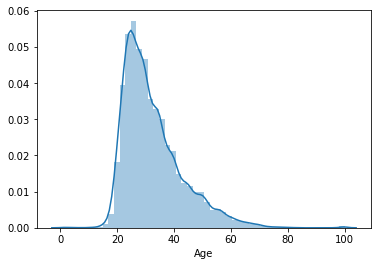

In [20]:
sns.distplot(mcq[mcq['Age']>0]['Age'])

- 응답자는 20대부터 늘어나서 30대가 가장 많고 평균 나이는 32세이다.

### 학력
- 석사 > 학사 > 박사

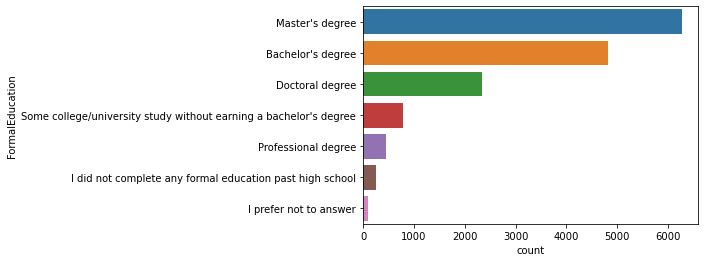

In [21]:
sns.countplot(y='FormalEducation', data=mcq, order=mcq['FormalEducation'].value_counts().index) 

### 전공
- 컴공 > 수학 > 컴공이 아닌 공학계열

In [22]:
# value_counts 사용해 그룹화된 데이터의 카운트 값을 확인
# normalize=True 옵션 사용해 해당 데이터가 전체 데이터에서 차지하는 비율 확인
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_count

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


In [23]:
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
mcq_major_percent

,MajorSelect
Computer Science,0.331074
Mathematics or statistics,0.167156
Engineering (non-computer focused),0.100821
Electrical Engineering,0.098110
Other,0.063851
Physics,0.062495
"Information technology, networking, or system administration",0.052180
A social science,0.039982
Biology,0.020631
Management information systems,0.017845


In [24]:
mcq_major_count_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)
mcq_major_count_df

,MajorSelect_x,MajorSelect_y
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


In [25]:
mcq_major_count_df.columns = ['응답 수', '비율']
mcq_major_count_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


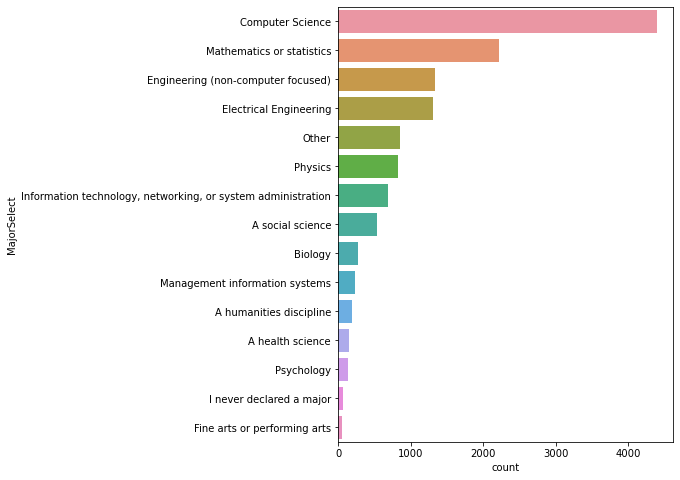

In [26]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq, order=mcq['MajorSelect'].value_counts().index)

### 재직/취업 여부

In [27]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


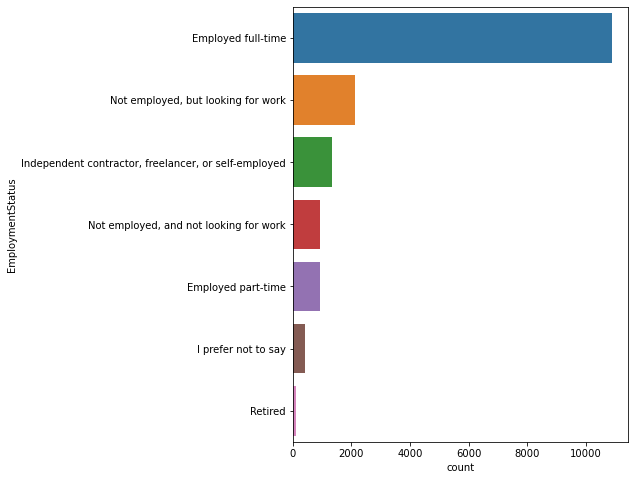

In [28]:
plt.figure(figsize=(6,8))
sns.countplot(y='EmploymentStatus', data=mcq, order=mcq['EmploymentStatus'].value_counts().index)

- 65% 이상의 응답자가 전 시간제(풀타임) 정규직이다.

### 프로그래밍 경험

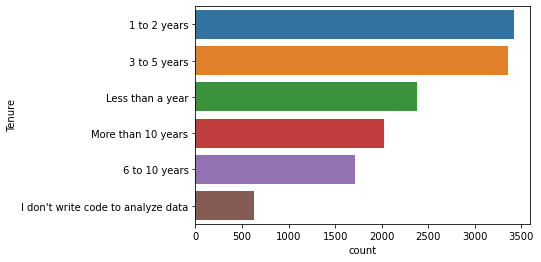

In [29]:
sns.countplot(y='Tenure', data=mcq, order=mcq['Tenure'].value_counts().index)

In [30]:
mcq_pro_count = pd.DataFrame(mcq['Tenure'].value_counts())
mcq_pro_percent = pd.DataFrame(mcq['Tenure'].value_counts(normalize=True))
mcq_pro_df = mcq_pro_count.merge(mcq_pro_percent, left_index=True, right_index=True)
mcq_pro_df.columns = ['응답 수', '비율']
mcq_pro_df

,응답 수,비율
1 to 2 years,3424,0.253030
3 to 5 years,3355,0.247931
Less than a year,2380,0.175879
More than 10 years,2028,0.149867
6 to 10 years,1714,0.126663
I don't write code to analyze data,631,0.046630


### 한국의 캐글러

The number of interviewees in Korea: 194


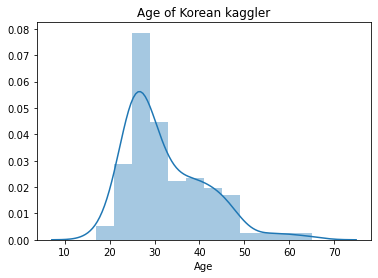

In [31]:
korea = mcq.loc[mcq['Country']=='South Korea']
print('The number of interviewees in Korea: ' + str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.title('Age of Korean kaggler')
plt.show()

In [32]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Gender of Korean kaggler')

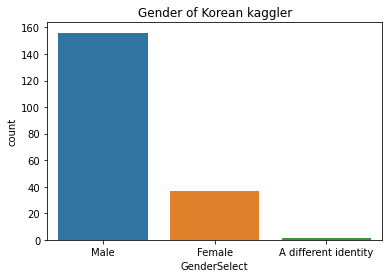

In [33]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Gender of Korean kaggler')

Text(0.5, 1.0, 'Korean male')

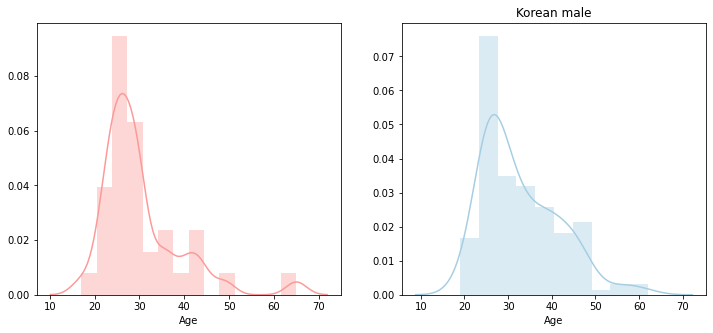

In [34]:
# 성별 나눠서 연령대 별로 시각화
figure, (ax1, ax2) = plt.subplots(ncols=2)


figure.set_size_inches(12,5)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[4], ax=ax1)
plt.title('Korean female')


sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False, color=sns.color_palette('Paired')[0], ax=ax2)
plt.title('Korean male')

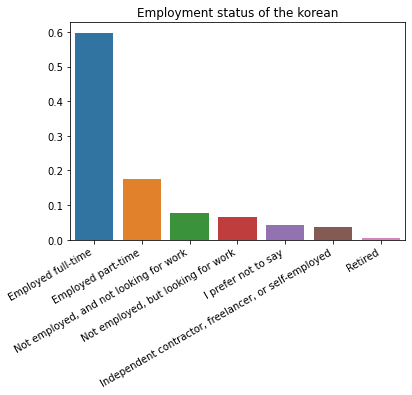

In [35]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

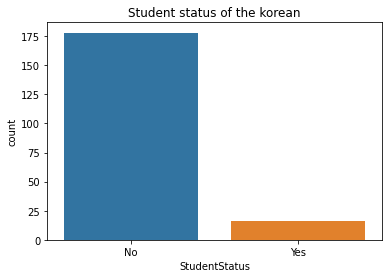

In [36]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x=korea['StudentStatus'], data=korea)
plt.title('Student status of the korean')
plt.show()

In [37]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


### 자주 묻는 질문 FAQ
- 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해보기

#### Q1. Python과 R 중 어떤 언어를 배워야 할까요?

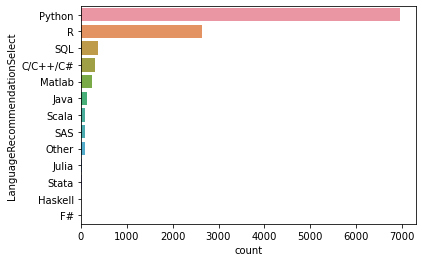

In [38]:
# Python vs R 
sns.countplot(y='LanguageRecommendationSelect', data=mcq, order=mcq['LanguageRecommendationSelect'].value_counts().index)

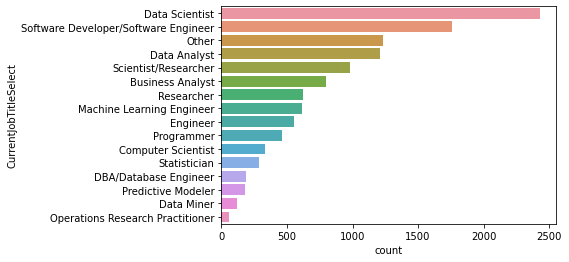

In [39]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'], order=mcq['CurrentJobTitleSelect'].value_counts().index)

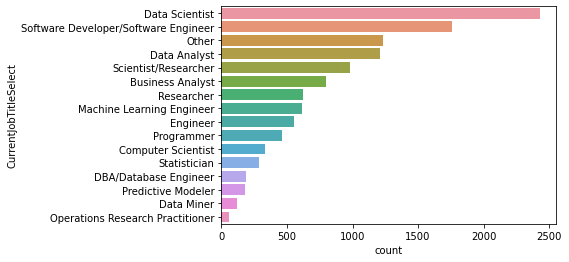

In [40]:
# 현재 하고 있는 일
opt = 'CurrentJobTitleSelect'
currentjob = mcq[opt]
sns.countplot(y=currentjob, order=currentjob.value_counts().index)

데이터 사이언티스트, 소프트웨어 개발자와 같이 IT 관련 종사자들이 캐글을 많이 사용하고 있는 것을 알 수 있다.

In [41]:
# 현재 하고 있는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(11830,)

In [42]:
# 현재 하고 있는 일에 대한 전체 응답 수
mcq[currentjob.notnull()][opt].shape

(11830,)

In [43]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (mcq['LanguageRecommendationSelect']=='Python') | (mcq['LanguageRecommendationSelect']=='R')]
print(data.shape)

(7737, 228)


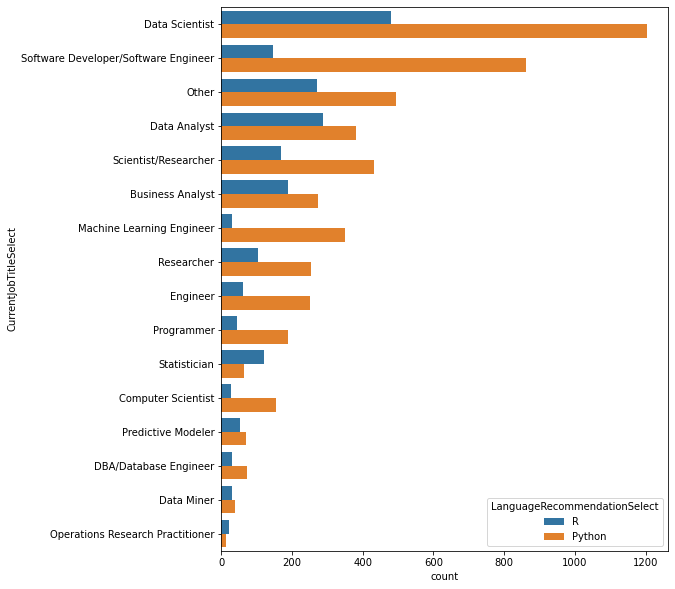

In [44]:
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data, order=data['CurrentJobTitleSelect'].value_counts().index)

대체로 Python을 많이 사용하는 편이다. 통계학자, operations research practitioner는 Python보다 R을 더 많이 사용한다.

#### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?
- 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

- 데이터 사이언스 툴

In [45]:
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index=True, right_index=True).head(20)
mcq_ml_tool_df.columns = ['응답 수', '비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


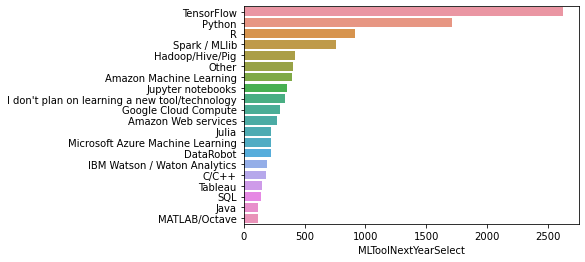

In [46]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다. 응답결과 Python은 15% R은 8%로 나타난다.

클라우드의 응답 결과는 Amazon ML > GCP > AWS > MS Azure ML > IBM Watson 순으로 많다

- 데이터사이언스 방법

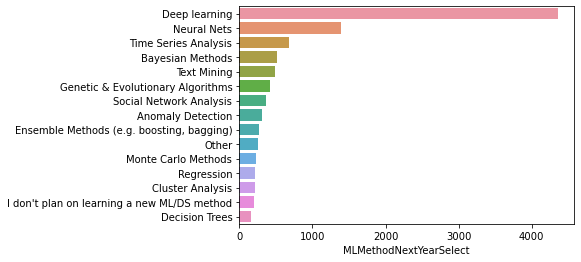

In [47]:
data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

#### Q3. 어디에서 데이터 사이언스를 배워야 할까?

In [48]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str')
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

In [49]:
s.value_counts()

nan                                                                                                                                            5445
Kaggle                                                                                                                                          210
Online courses                                                                                                                                  209
Personal Projects                                                                                                                               155
College/University                                                                                                                              127
                                                                                                                                               ... 
Arxiv,Blogs,Company internal community,Kaggle,Non-Kaggle online communities,Personal Projects                   

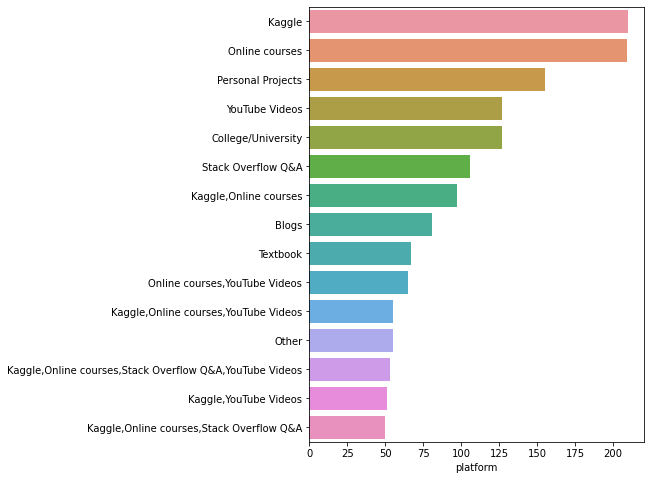

In [50]:
plt.figure(figsize=(6,8))
data = s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index, x=data)

응답자가 캐글러여서 그런지 캐글이 가장 인기있는 학습 플랫폼으로 선정되었다.

=> 응답 편향되었을 수 있다.

In [51]:
# 설문 내용과 누구에게 물어봤는지를 알아보자
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [52]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1]

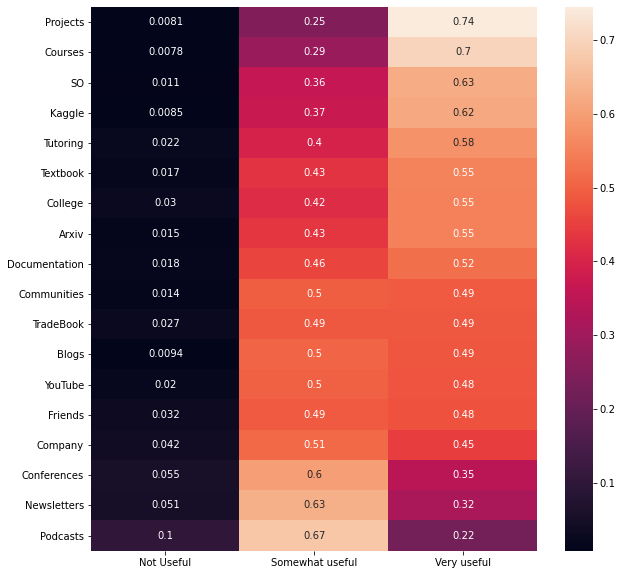

In [53]:
# 학습 플랫폼과 유용함에 대한 연관성 살펴보기
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending=False)

# 학습 플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려보자
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values('Very useful', ascending=False), annot=True)

1에 가까울수록 유용하다.
- SO == Stackoverflow

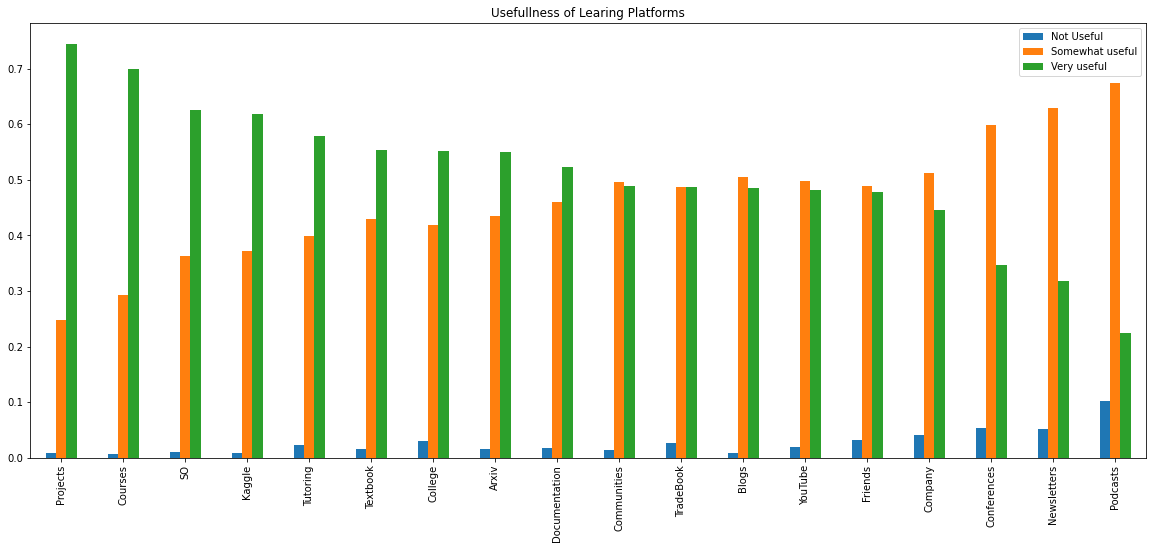

In [54]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다.
fdf.plot(kind='bar', figsize=(20,8), title='Usefullness of Learing Platforms')

- 프로젝트 > 강의 > 스택오버플로우 > 캐글 > 튜터링 순으로 유용하다는 응답
- Podcast는 때때로 유용하다는 응답이 가장 많다.

In [55]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory')!=-1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [56]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

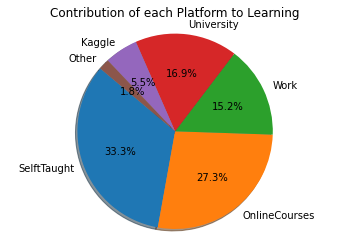

In [57]:
# 학습 플랫폼 별 도움이 되는 정보 그리기
# seaborn은 piechart 없다. 지원할 예정도 없음
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Contribution of each Platform to Learning')
plt.show()

도움이 되는 학습 플랫품 : 개인프로젝트 > 온라인 코스 > 대학 > 캐글

#### Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [58]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [59]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [60]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x:
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [61]:
s = s[s!='nan']

In [62]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Azure,669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


#### Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?

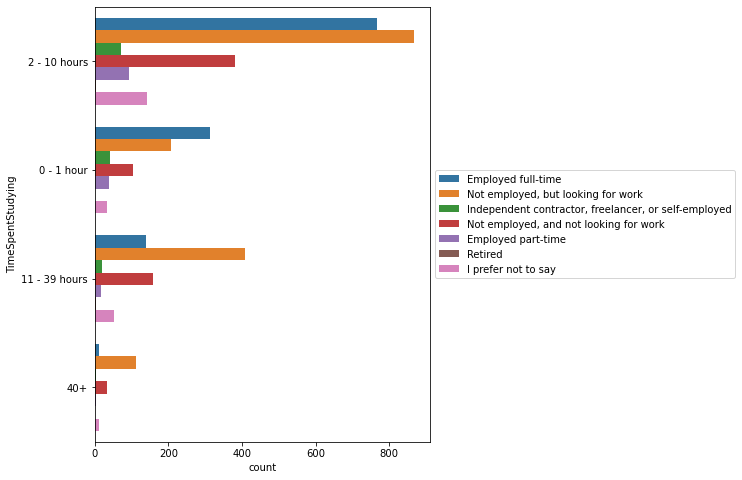

In [63]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
             data=mcq,
             hue='EmploymentStatus').legend(loc='center left',bbox_to_anchor=(1,0.5))

풀타임 노동자는 2~10시간 일하는 비율이 높고 구직자가 노동자보다 더 많은 시간을 학습에 할애한다.
하지만 응답자 중 대부분이 풀타임 노동자라는 것을 고려할 필요가 있다.

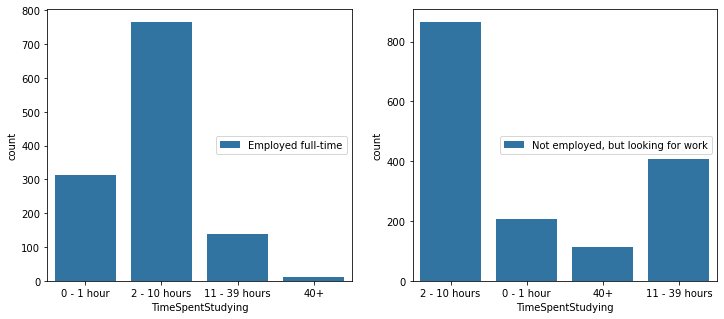

In [64]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
             data=full_time,
             hue='EmploymentStatus',
             ax=ax1).legend(loc='center right', bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying',
             data=looking_for_job,
             hue='EmploymentStatus',
             ax=ax2).legend(loc='center right', bbox_to_anchor=(1,0.5))

#### Q6. 블로그. 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [65]:
mcq

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16711,Female,Other,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16712,Male,Indonesia,25.0,Employed full-time,NaN,NaN,Yes,NaN,Programmer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16713,Female,Taiwan,25.0,Employed part-time,NaN,NaN,No,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16714,Female,Singapore,16.0,I prefer not to say,Yes,"Yes, but data science is a small part of what ...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [67]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [68]:
s = s[s != 'nan'].value_counts().head(20)

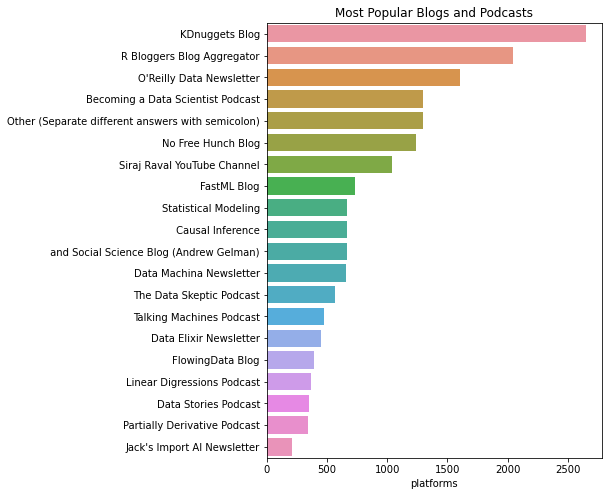

In [69]:
plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index, x=s)

In [70]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'
].astype('str').apply(lambda x: x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [71]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
             axis=1).stack().reset_index(level=1, drop=True)
t.name= 'courses'
t.head()

0         nan
1         nan
2    Coursera
2         edX
3         nan
Name: courses, dtype: object

In [72]:
t = t[t != 'nan'].value_counts().head(20)

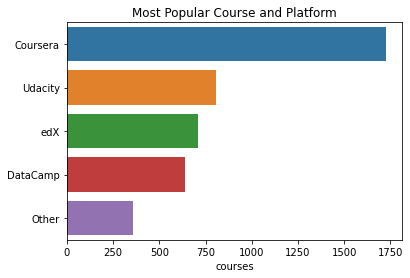

In [73]:
plt.title("Most Popular Course and Platform")
sns.barplot(y=t.index, x=t)

#### Q7.  데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?

In [74]:
job_features = [
    x for x in mcq.columns if x.find(
        'JobSkillImportance') != -1 
    and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [75]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a

jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [76]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


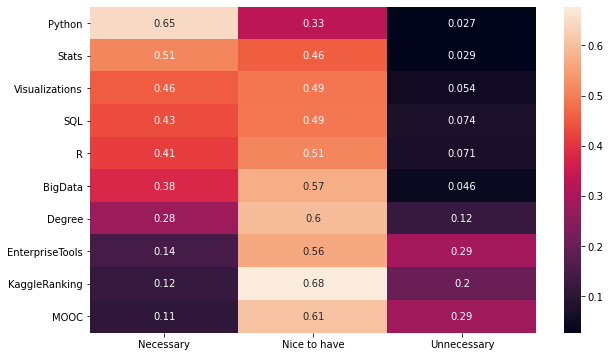

In [77]:
# 1에 가까울수록 필요한 것
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary", ascending=False), annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

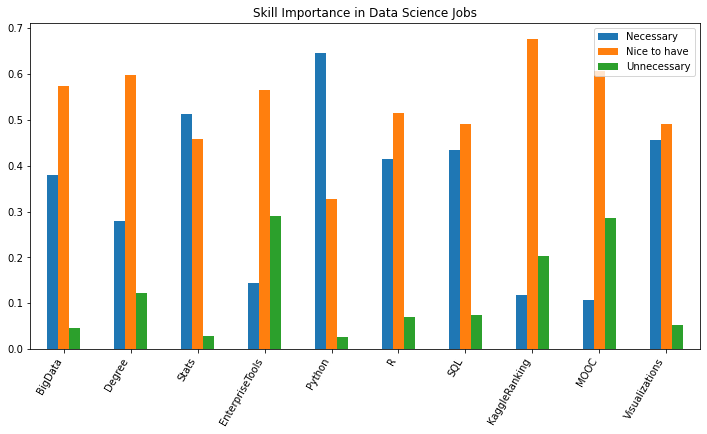

In [78]:
jdf.plot(kind='bar', figsize=(12,6), title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60, ha='right')

#### Q8. 데이터 과학자의 평균 급여는 얼마나 될까?

In [79]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [80]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('data/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[
    ['CompensationAmount','CompensationCurrency',
     'GenderSelect',
     'Country',
     'CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',
                      right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [81]:
print('Maximum Salary is USD $',
      salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',
      salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',
      salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 208999999
Minimum Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Maximum Salary는 가짜 응답

Text(0.5, 1.0, 'Salary Distribution')

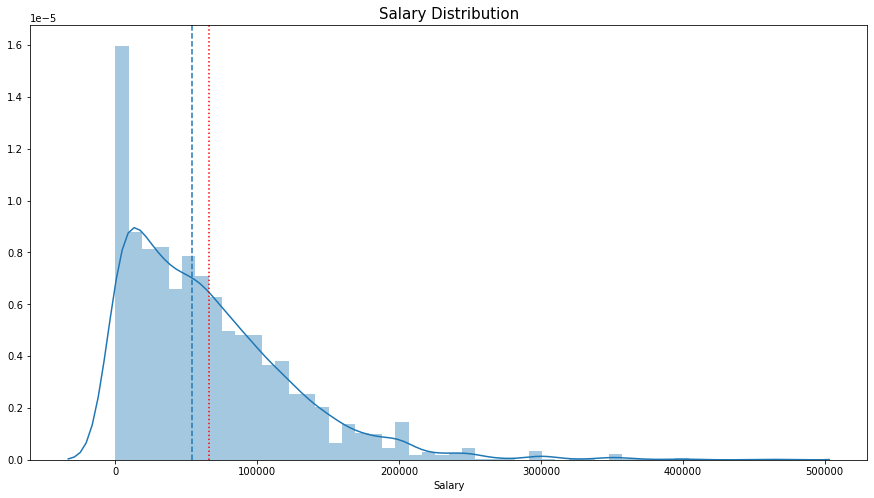

In [82]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])

# 중앙값을 표시
plt.axvline(salary['Salary'].median(), linestyle='dashed')


plt.axvline(salary['Salary'].mean(), linestyle='dotted', color='red')

plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

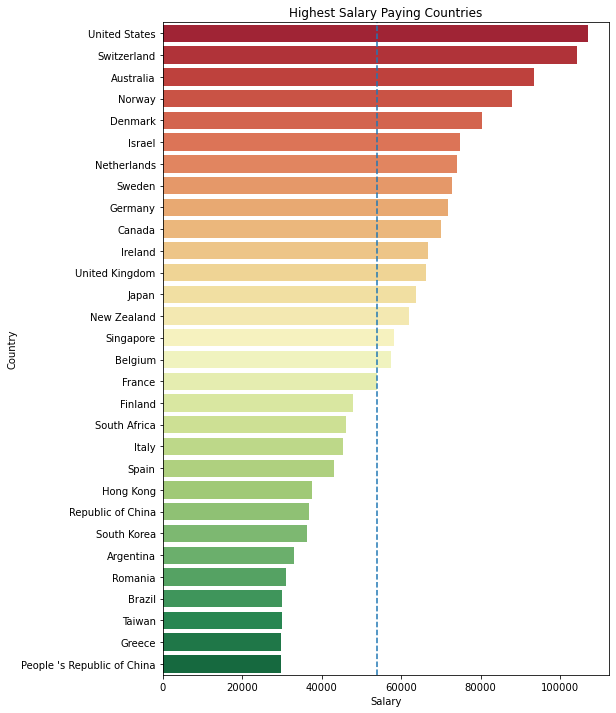

In [83]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby(
    'Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()

sns.barplot('Salary', 
            sal_coun.index,
            data = sal_coun,
            palette='RdYlGn')

plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

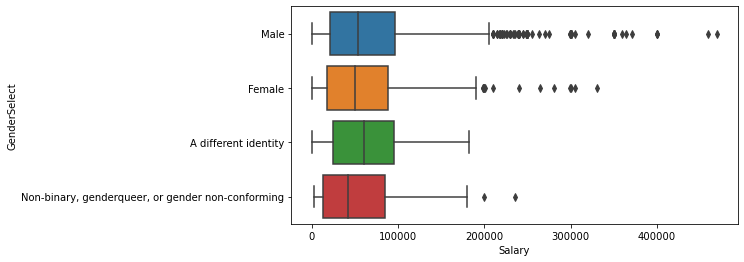

In [84]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

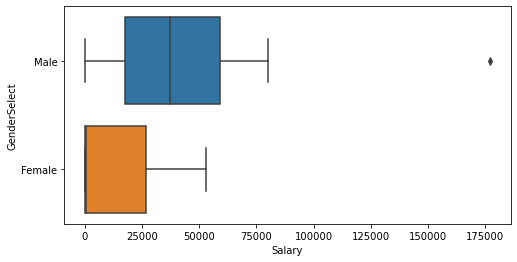

In [85]:
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [86]:
salary_korea.shape

(26, 8)

In [87]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [88]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [89]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


#### Q9. 개인프로젝트나 학습용 데이터를 어디에서 얻나요?

In [90]:
mcq['PublicDatasetsSelect'] = mcq[
    'PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(',')
    )

In [91]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)

q.name = 'courses'

In [92]:
q = q[q != 'nan'].value_counts()

In [93]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


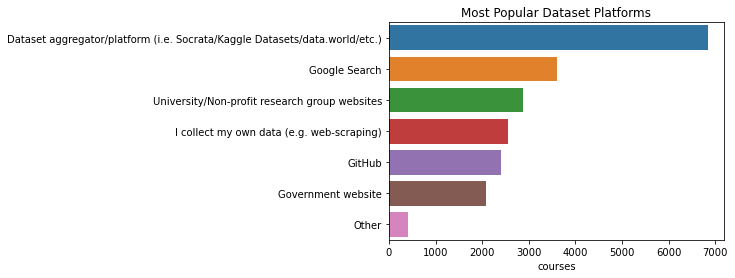

In [94]:
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [95]:
# 주관식 응답을 읽어온다.
ff = pd.read_csv('data/freeformResponses.csv', 
                 encoding="ISO-8859-1", low_memory=False)
ff.shape

(16716, 62)

In [96]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

#### 개인프로젝트에서 공개된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?

In [97]:
ppcff = ff[
    'PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning,20
Cleaning the data,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
Size,9
-,9


데이터 정제가 가장 어려운 점으로 보인다.

In [98]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [99]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# %matplotlib inline 설정을 해주어야지만 노트북 안에 그래프가 디스플레이 된다.
%matplotlib inline
%config InlineBackend.figure_format='retina'

def displayWordCloud(data = None, backgroundcolor = 'white', width=1200, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [100]:
ppc = ff['PersonalProjectsChallengeFreeForm'].dropna()

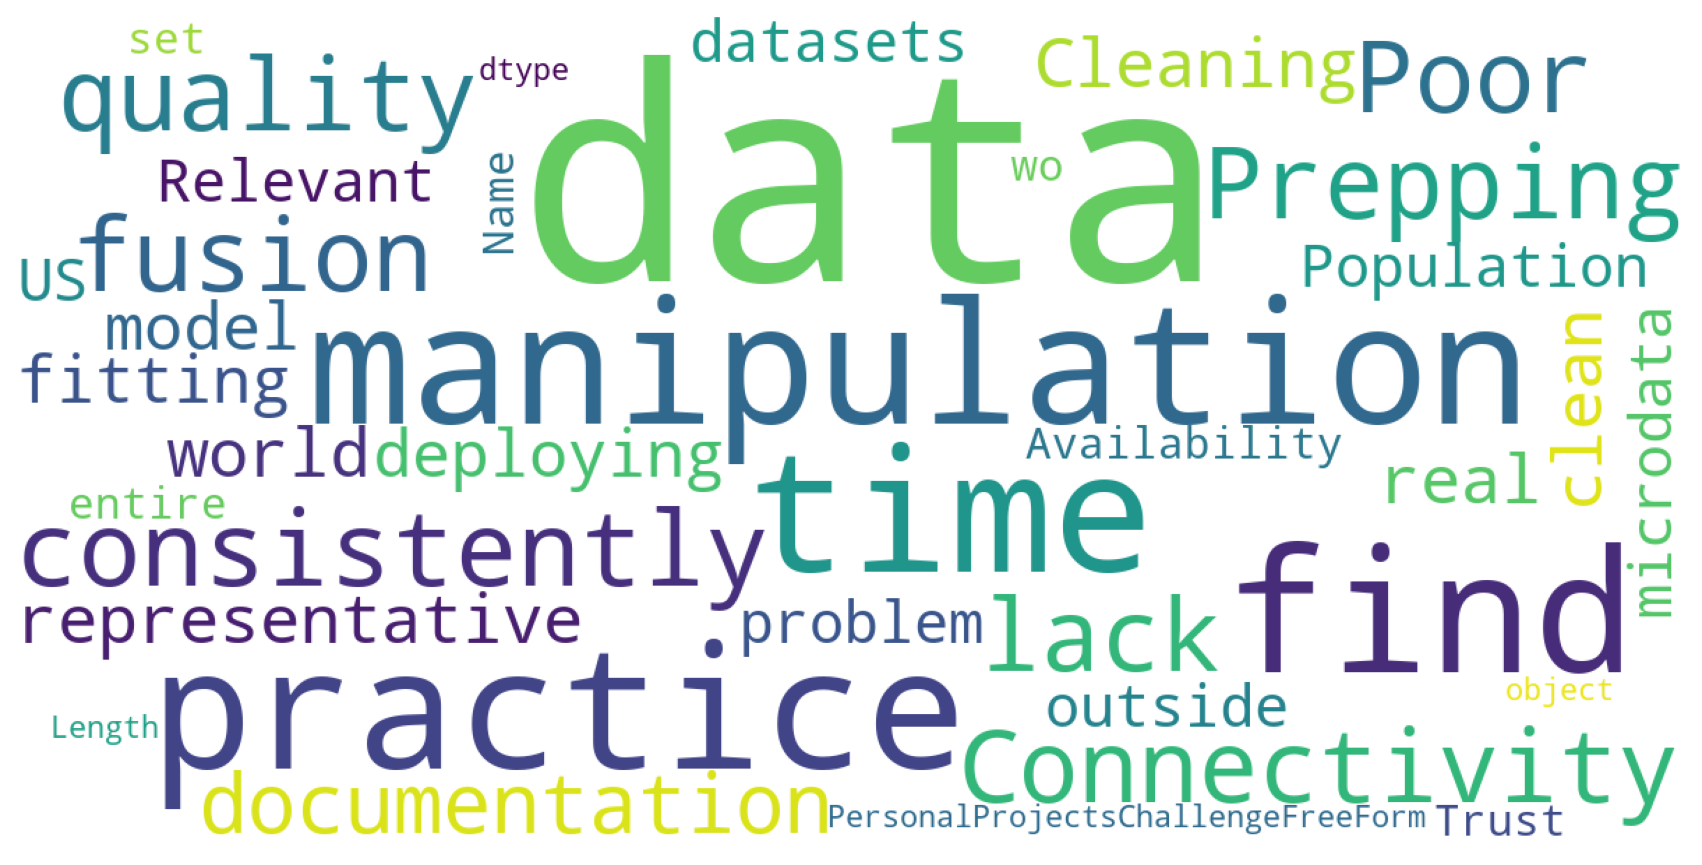

Wall time: 1.3 s


In [101]:
%time displayWordCloud(''.join(str(ppc)))

#### Q11. 데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?

In [102]:
time_features = [
    x for x in mcq.columns if x.find('Time') != -1][4:10]

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



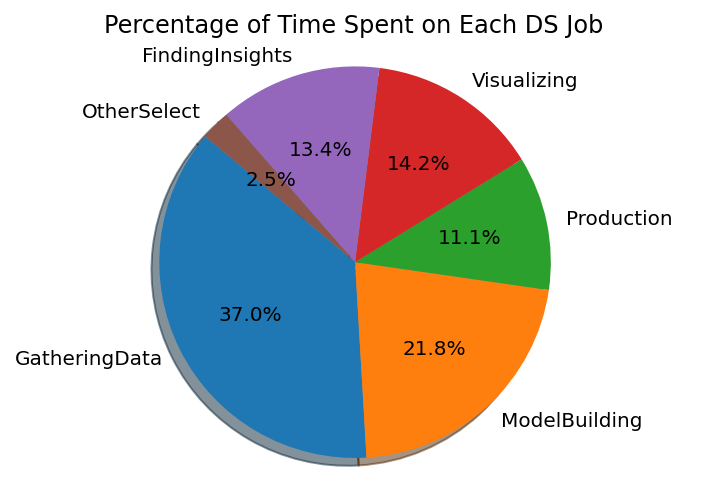

In [103]:
tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

데이터 수집, 모델링, 시각화하는 것이 업무에서 많은 시간을 차지한다.

#### Q11. 데이터사이언스 직업을 찾는데 가장 고려해야 할 요소는 무엇일까요?

In [105]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [106]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [108]:
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
job_factors = [
    x for x in mcq.columns if x.find('JobFactor') != -1]

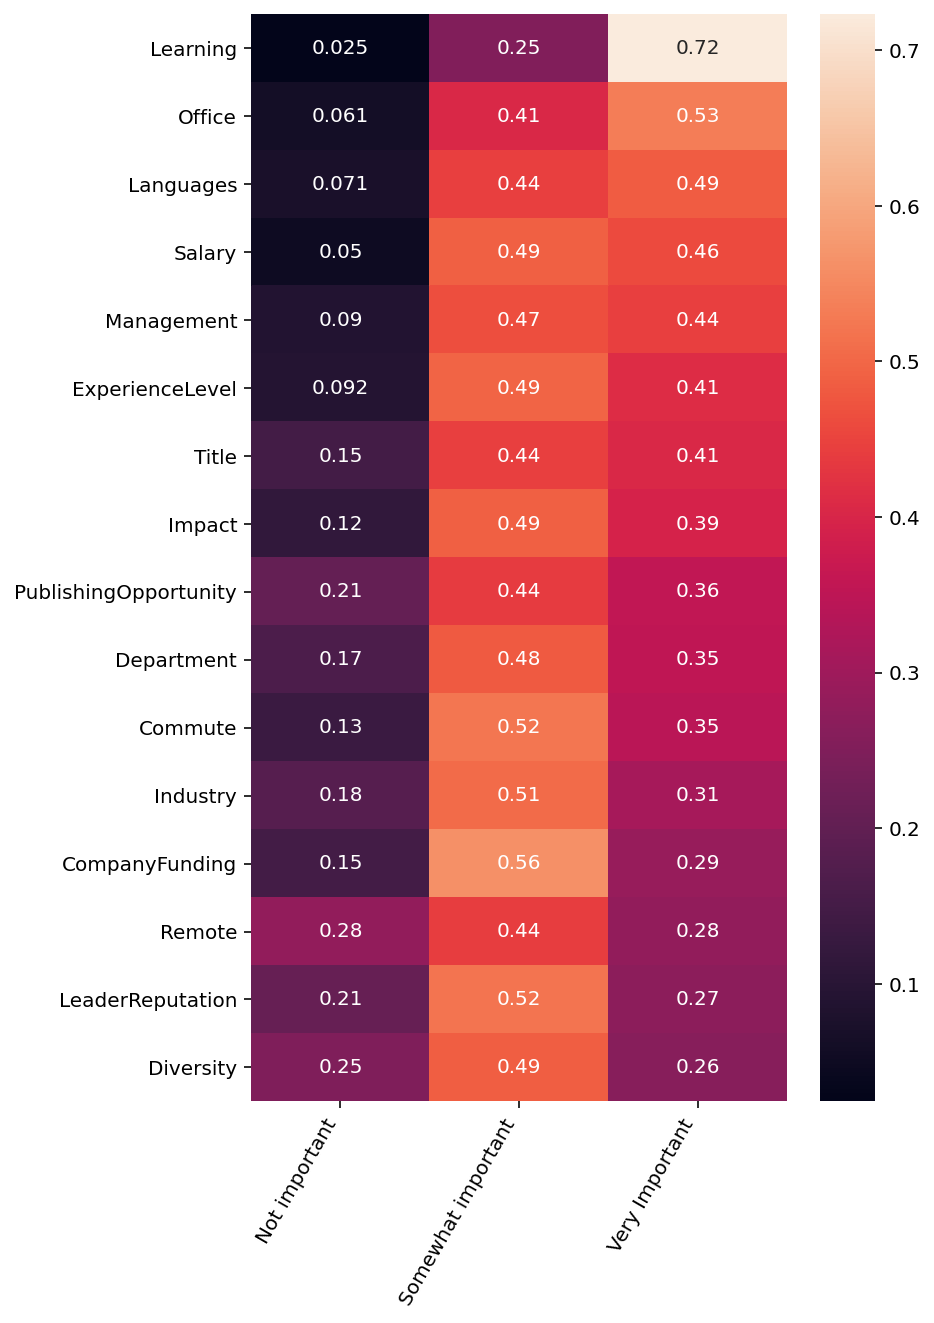

In [109]:
jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

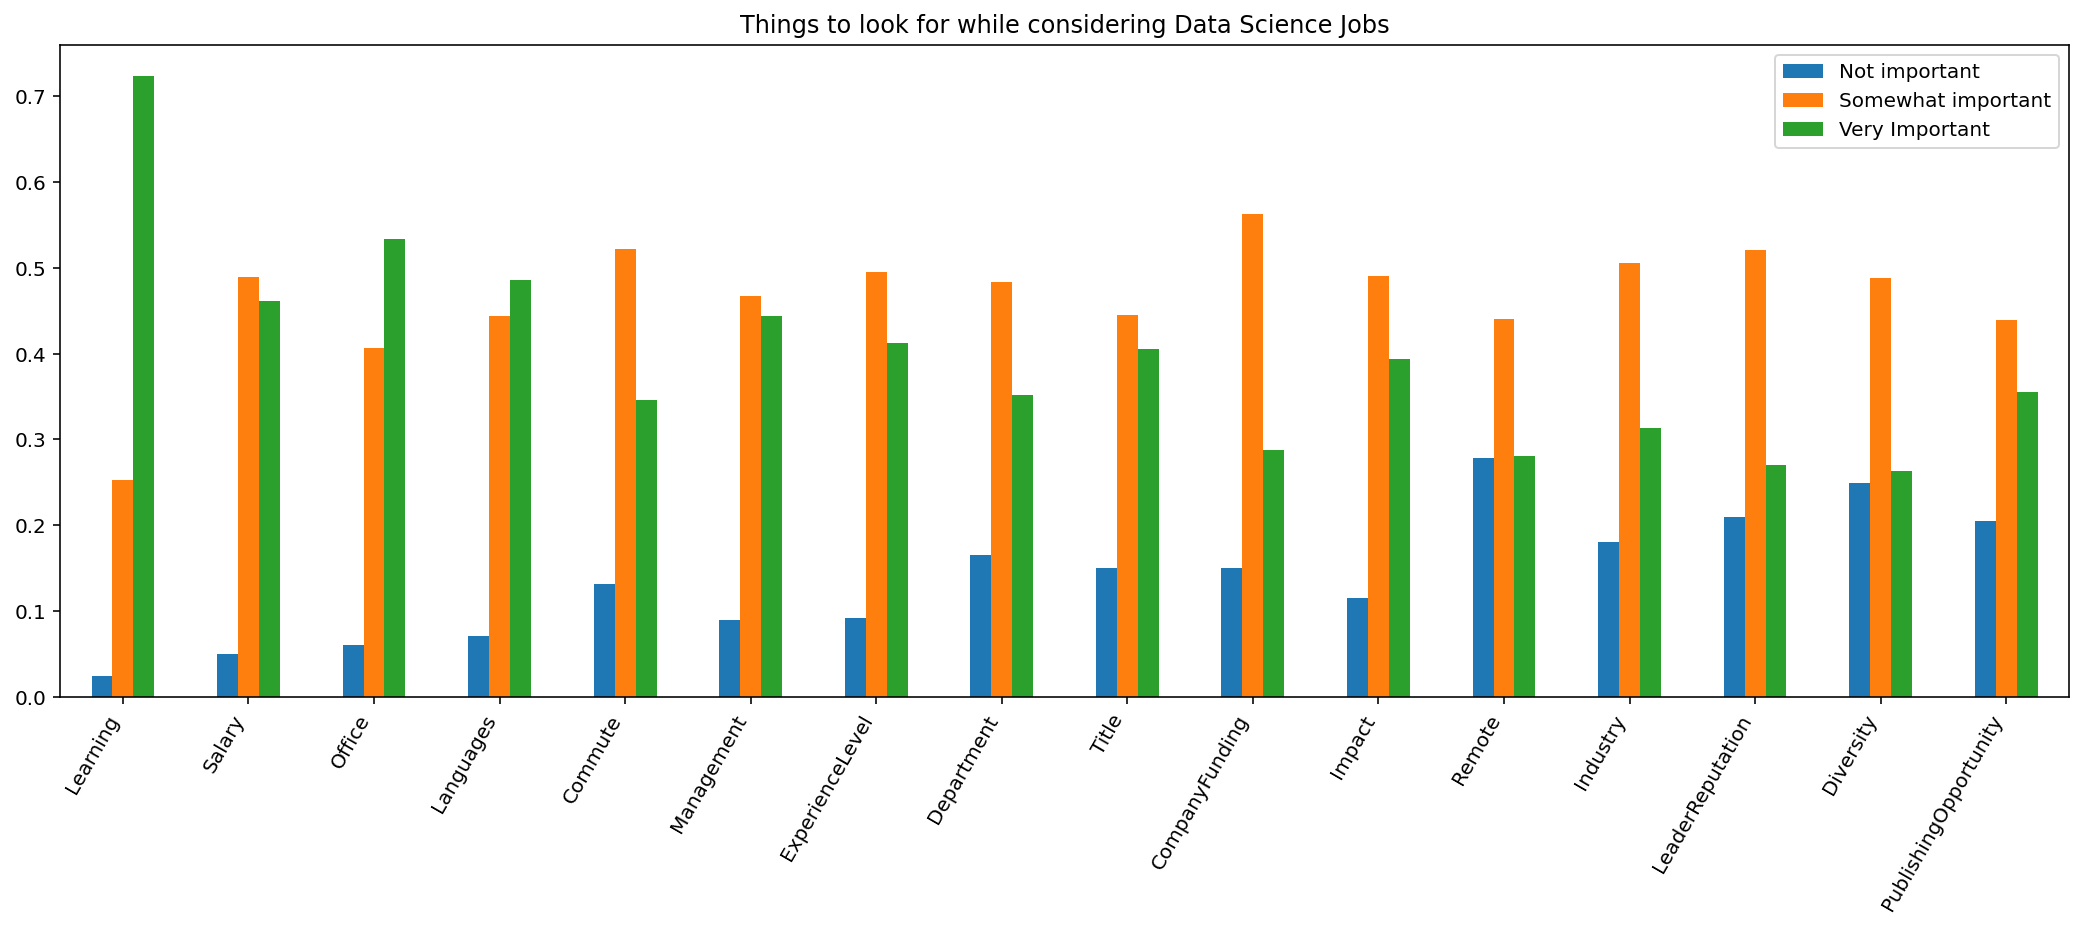

In [110]:
jfdf.plot(kind='bar', figsize=(18,6), 
          title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60, ha='right')
plt.show()

#### Q12. 데이터 사이언티스트가 되기 위해 학위가 중요할까요?

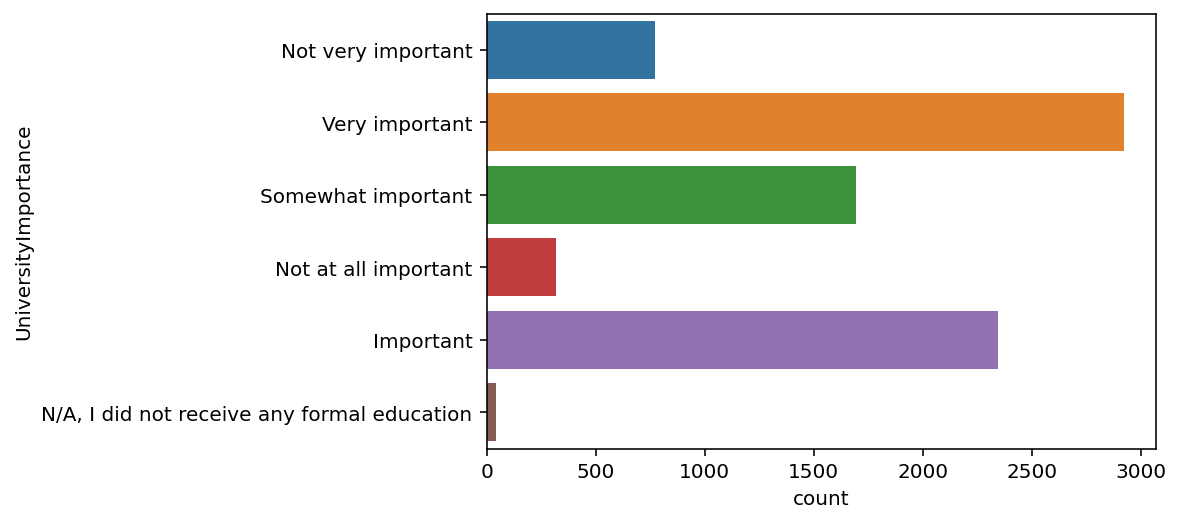

In [111]:
sns.countplot(y='UniversityImportance', data=mcq)

In [114]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [115]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & \
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

#### Q13. 어디에서 부터 데이터사이언스를 시작해야 할까요?

In [117]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

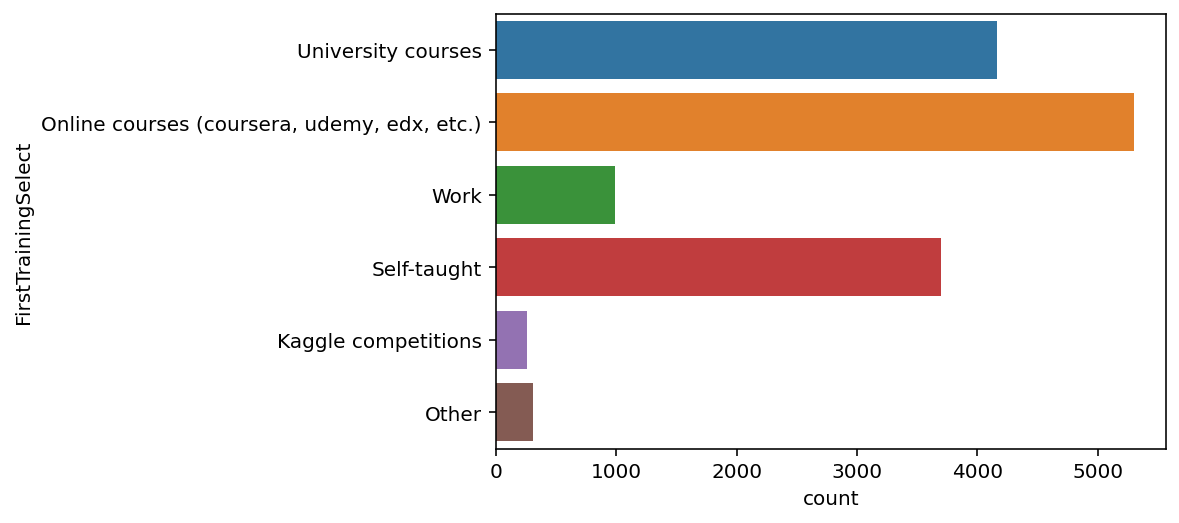

In [118]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

#### Q14. 데이터사이언티스트 이력서에서 가장 중요한 것은 무엇일까요?

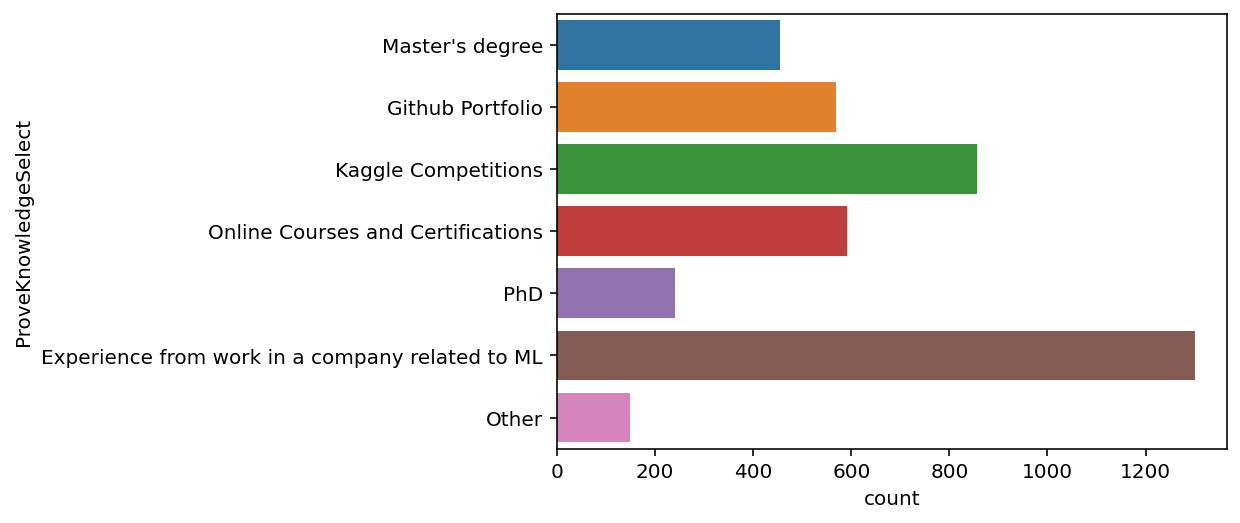

In [119]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

#### Q15. 머신러닝 알고리즘을 사용하기 위해 수학이 필요할까요?

In [120]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question[
    'Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [121]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

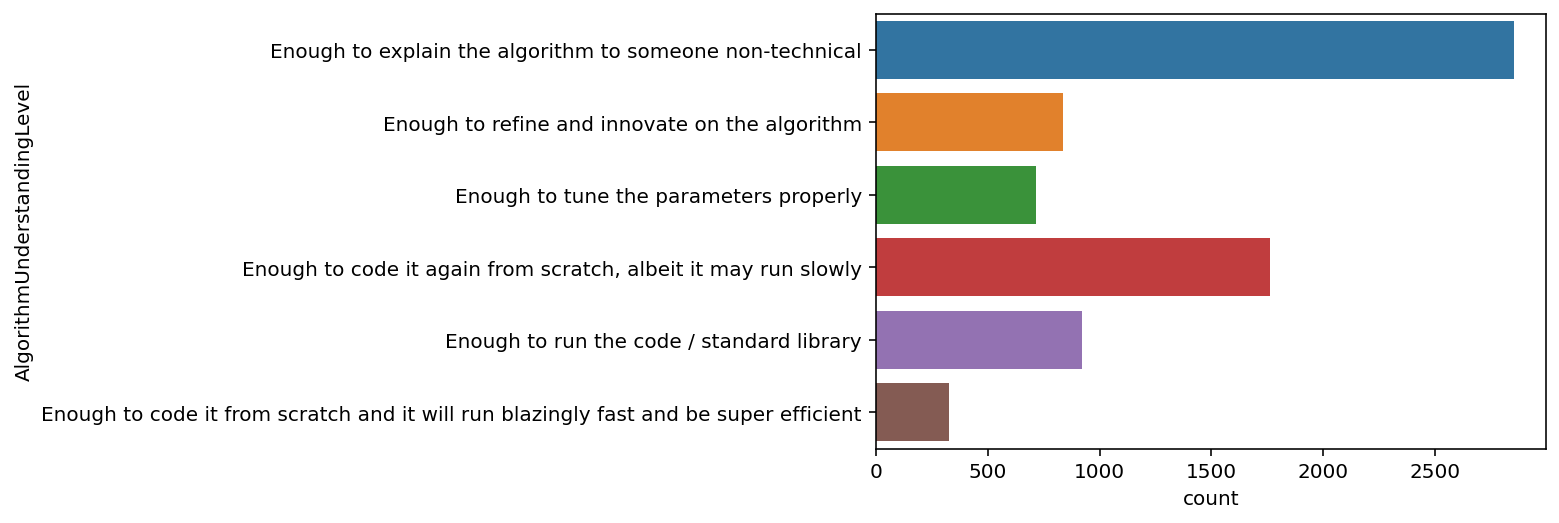

In [122]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

#### Q16. 어디에서 일을 찾아야 할까요?

In [123]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question[
    'Column'].str.contains(
    'JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


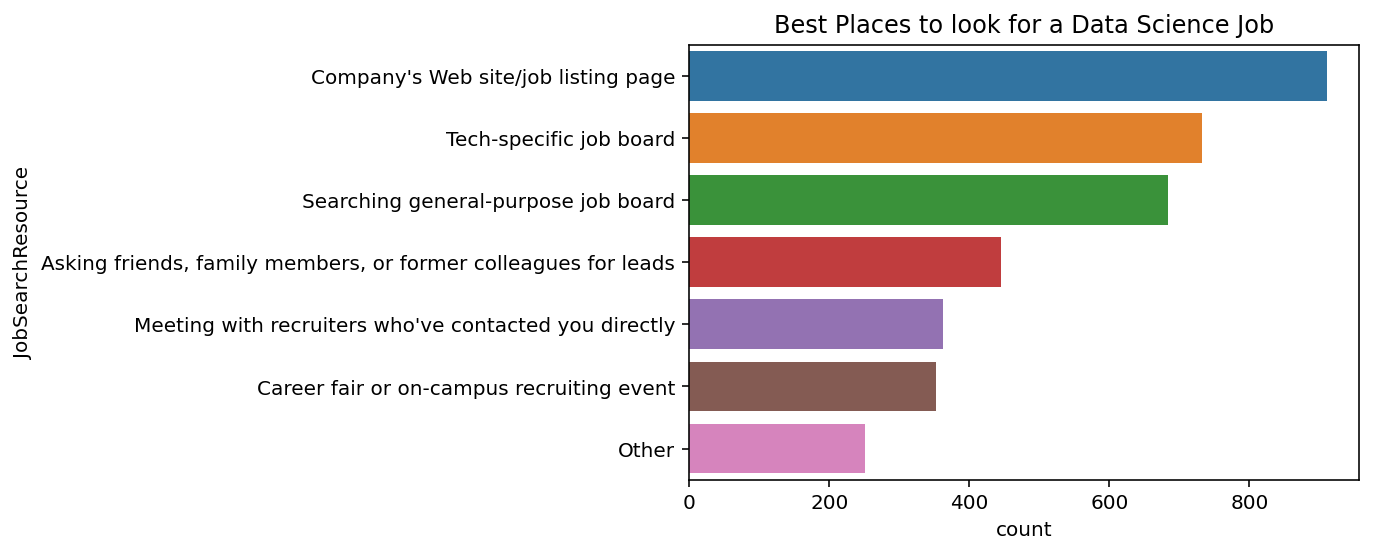

In [129]:
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=mcq, order=mcq['JobSearchResource'].value_counts().index)

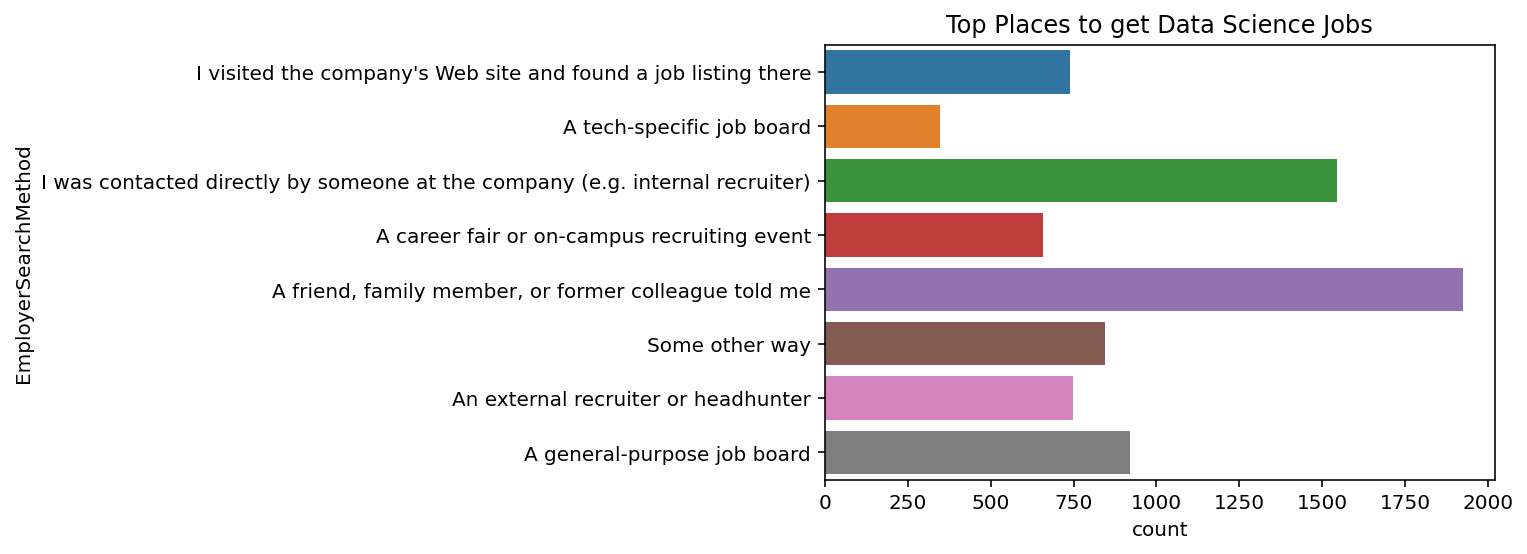

In [125]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=mcq)

#### Q17. 그럼 한국 사람들은 어떨까?

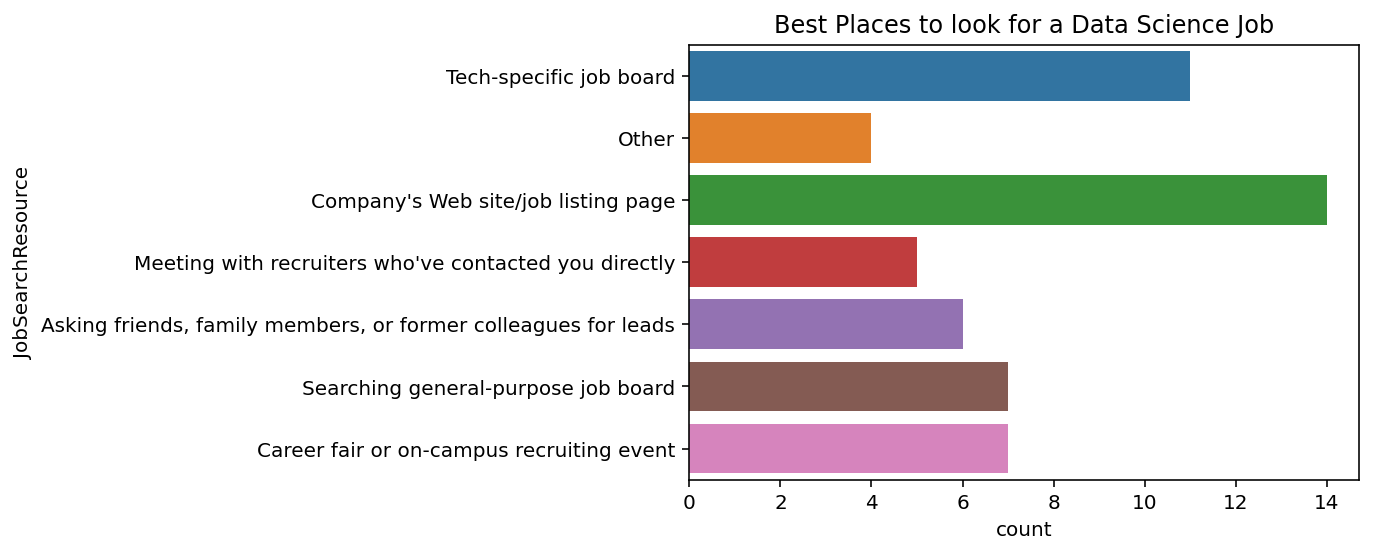

In [126]:
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource', data=korea)

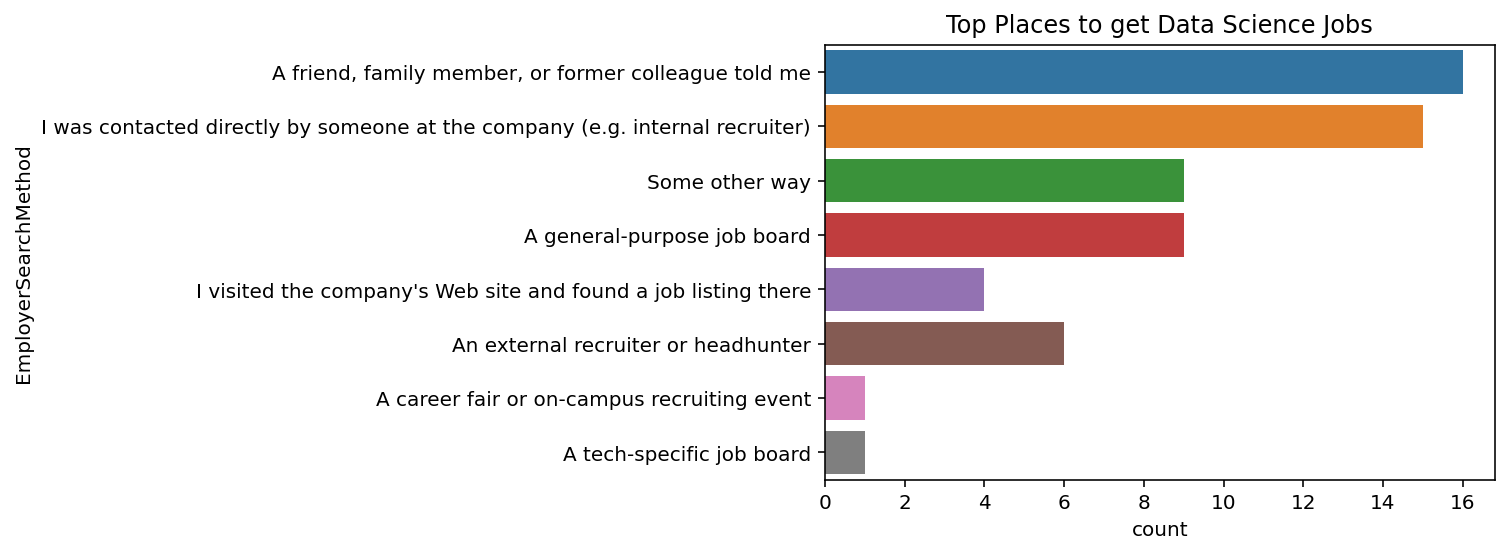

In [127]:
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod', data=korea)